# Decision Trees and Random Forests

Decision Trees:

* Decision Trees are a type of supervised machine learning algorithm used for both classification and regression tasks.
* They work by recursively splitting the data into subsets based on the most significant features.
* At each node of the tree, a decision is made by evaluating a feature's value.
The goal is to create a tree structure that best separates or predicts the target variable.
* Decision Trees can be prone to overfitting, but they are interpretable and can serve as the basis for more advanced ensemble methods.

Random Forests:

* Random Forests are an ensemble learning method based on Decision Trees.
They create multiple Decision Trees during training, each with a random subset of the data and features.
* When making predictions, the results from multiple trees are combined (e.g., voting for classification or averaging for regression).
* Random Forests improve the robustness and generalization of the model and reduce the risk of overfitting.
* They are widely used for classification and regression tasks and are known for their accuracy and versatility.

We're going to use the House Price dataset we used last time ([link text](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv))

In [32]:
%pip install pandas
%pip install matplotlib.pyplot
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
 

In [33]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
# Load the House Prices dataset
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


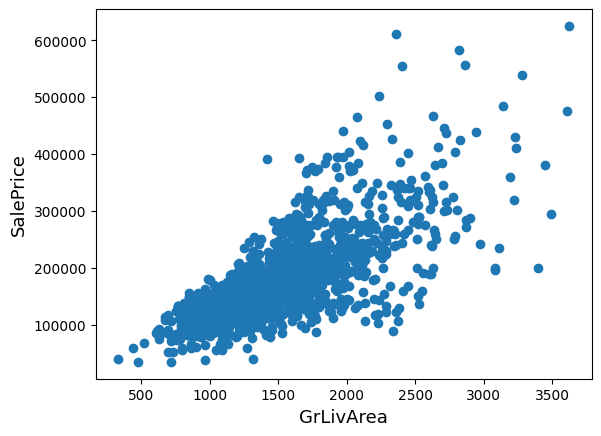

In [35]:
# Delete the outliers -> df['GrLivArea']>4000
df_sample = df.drop(df[df['GrLivArea']>4000].index)

# Plot it again
fig, ax = plt.subplots()
ax.scatter(df_sample['GrLivArea'], df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [36]:
# Filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'MasVnrArea', 'YearBuilt',
                  'MSZoning', 'Neighborhood', 'KitchenQual',
                  'SalePrice']

# Save the new dataset into df_sample
df_sample = df.loc[:, columns_to_use]

In [37]:
df_sample

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,MasVnrArea,YearBuilt,MSZoning,Neighborhood,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,196.0,2003,RL,CollgCr,Gd,208500
1,9600,2007,460,1976.0,1262,6,0.0,1976,RL,Veenker,TA,181500
2,11250,2008,608,2001.0,1786,7,162.0,2001,RL,CollgCr,Gd,223500
3,9550,2006,642,1998.0,1717,7,0.0,1915,RL,Crawfor,Gd,140000
4,14260,2008,836,2000.0,2198,8,350.0,2000,RL,NoRidge,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,0.0,1999,RL,Gilbert,TA,175000
1456,13175,2010,500,1978.0,2073,6,119.0,1978,RL,NWAmes,TA,210000
1457,9042,2010,252,1941.0,2340,7,0.0,1941,RL,Crawfor,Gd,266500
1458,9717,2010,240,1950.0,1078,5,0.0,1950,RL,NAmes,Gd,142125


In [38]:
# Look into the number of nulls we have (sort the values to have the emptiest column on top)
nulls = df_sample.isnull().sum().sort_values(ascending=False)
nulls

GarageYrBlt     81
MasVnrArea       8
LotArea          0
YrSold           0
GarageArea       0
GrLivArea        0
OverallQual      0
YearBuilt        0
MSZoning         0
Neighborhood     0
KitchenQual      0
SalePrice        0
dtype: int64

In [39]:
# Fillna with mean for: GarageYrBlt, MasVnrAreas
df_sample.fillna(df_sample.mean(numeric_only=True), inplace=True)

In [40]:
df_sample.shape

(1460, 12)

In [41]:
# Create a second dataset from the first dataset
df_transformed = df_sample.copy()

# Use ordinal encoder to transform kitchen quality (KitchenQual)
from sklearn.preprocessing import OrdinalEncoder

# 'Fa': Fair, 'TA': Typical/Average, 'Gd': Good and 'Ex': Excellent
order = ['Fa','TA','Gd','Ex']

ord_enc = OrdinalEncoder(categories = [order])
df_transformed['KitchenQual'] = ord_enc.fit_transform(df_transformed[['KitchenQual']])
#df_transformed.drop(columns=['KitchenQual'], inplace=True)

# Specify the columns to be one-hot encoded (Convert categorical variable into as many 0/1 variables as there are different values)
columns_to_encode = ['Neighborhood', 'MSZoning']

# Perform one-hot encoding
encoded_df = pd.get_dummies(df_transformed, columns=columns_to_encode)
encoded_df

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,MasVnrArea,YearBuilt,KitchenQual,SalePrice,...,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,8450,2008,548,2003.0,1710,7,196.0,2003,2.0,208500,...,False,False,False,False,False,False,False,False,True,False
1,9600,2007,460,1976.0,1262,6,0.0,1976,1.0,181500,...,False,False,False,False,True,False,False,False,True,False
2,11250,2008,608,2001.0,1786,7,162.0,2001,2.0,223500,...,False,False,False,False,False,False,False,False,True,False
3,9550,2006,642,1998.0,1717,7,0.0,1915,2.0,140000,...,False,False,False,False,False,False,False,False,True,False
4,14260,2008,836,2000.0,2198,8,350.0,2000,2.0,250000,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,0.0,1999,1.0,175000,...,False,False,False,False,False,False,False,False,True,False
1456,13175,2010,500,1978.0,2073,6,119.0,1978,1.0,210000,...,False,False,False,False,False,False,False,False,True,False
1457,9042,2010,252,1941.0,2340,7,0.0,1941,2.0,266500,...,False,False,False,False,False,False,False,False,True,False
1458,9717,2010,240,1950.0,1078,5,0.0,1950,2.0,142125,...,False,False,False,False,False,False,False,False,True,False


In [42]:
encoded_df.dtypes

LotArea                   int64
YrSold                    int64
GarageArea                int64
GarageYrBlt             float64
GrLivArea                 int64
OverallQual               int64
MasVnrArea              float64
YearBuilt                 int64
KitchenQual             float64
SalePrice                 int64
Neighborhood_Blmngtn       bool
Neighborhood_Blueste       bool
Neighborhood_BrDale        bool
Neighborhood_BrkSide       bool
Neighborhood_ClearCr       bool
Neighborhood_CollgCr       bool
Neighborhood_Crawfor       bool
Neighborhood_Edwards       bool
Neighborhood_Gilbert       bool
Neighborhood_IDOTRR        bool
Neighborhood_MeadowV       bool
Neighborhood_Mitchel       bool
Neighborhood_NAmes         bool
Neighborhood_NPkVill       bool
Neighborhood_NWAmes        bool
Neighborhood_NoRidge       bool
Neighborhood_NridgHt       bool
Neighborhood_OldTown       bool
Neighborhood_SWISU         bool
Neighborhood_Sawyer        bool
Neighborhood_SawyerW       bool
Neighbor

In [43]:
# Create the X and Y based on having and not having the SalePrice column
X = encoded_df.drop(['SalePrice'], axis=1)
y = encoded_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [44]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

**Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=5)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

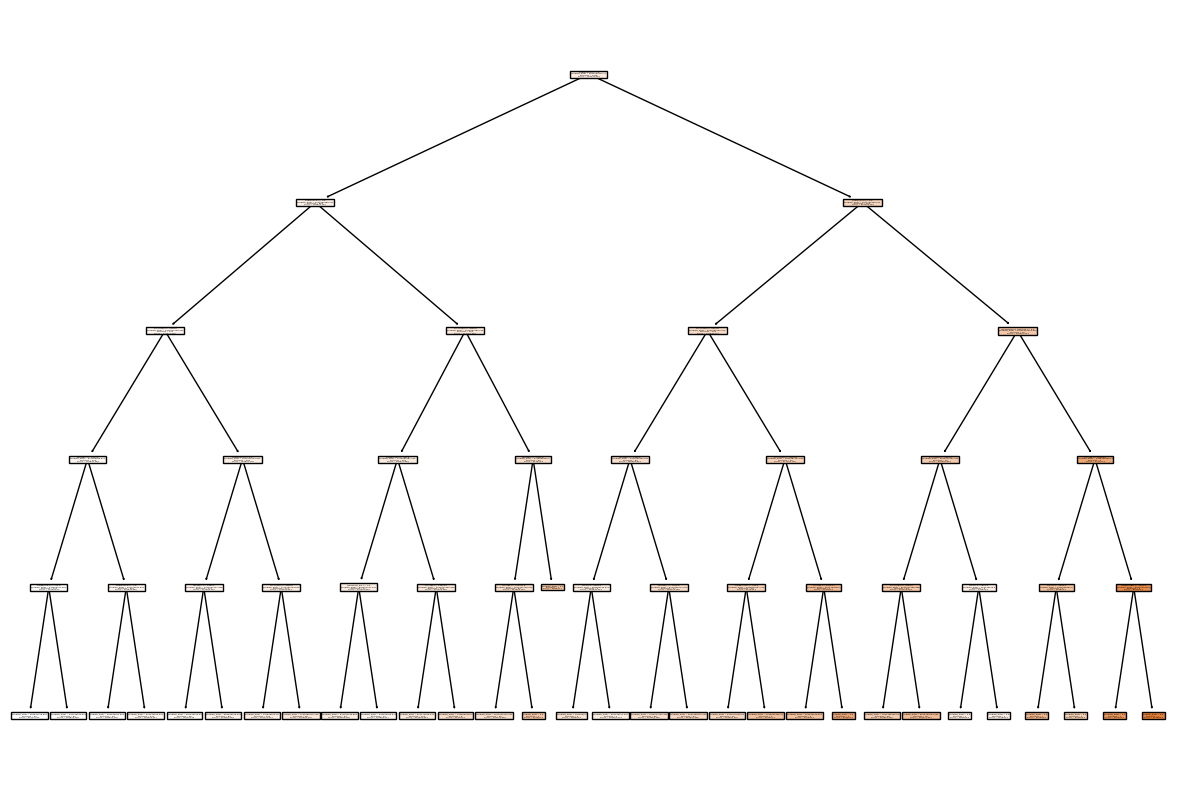

In [59]:
from sklearn.tree import plot_tree

# plot the tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns)
plt.show()

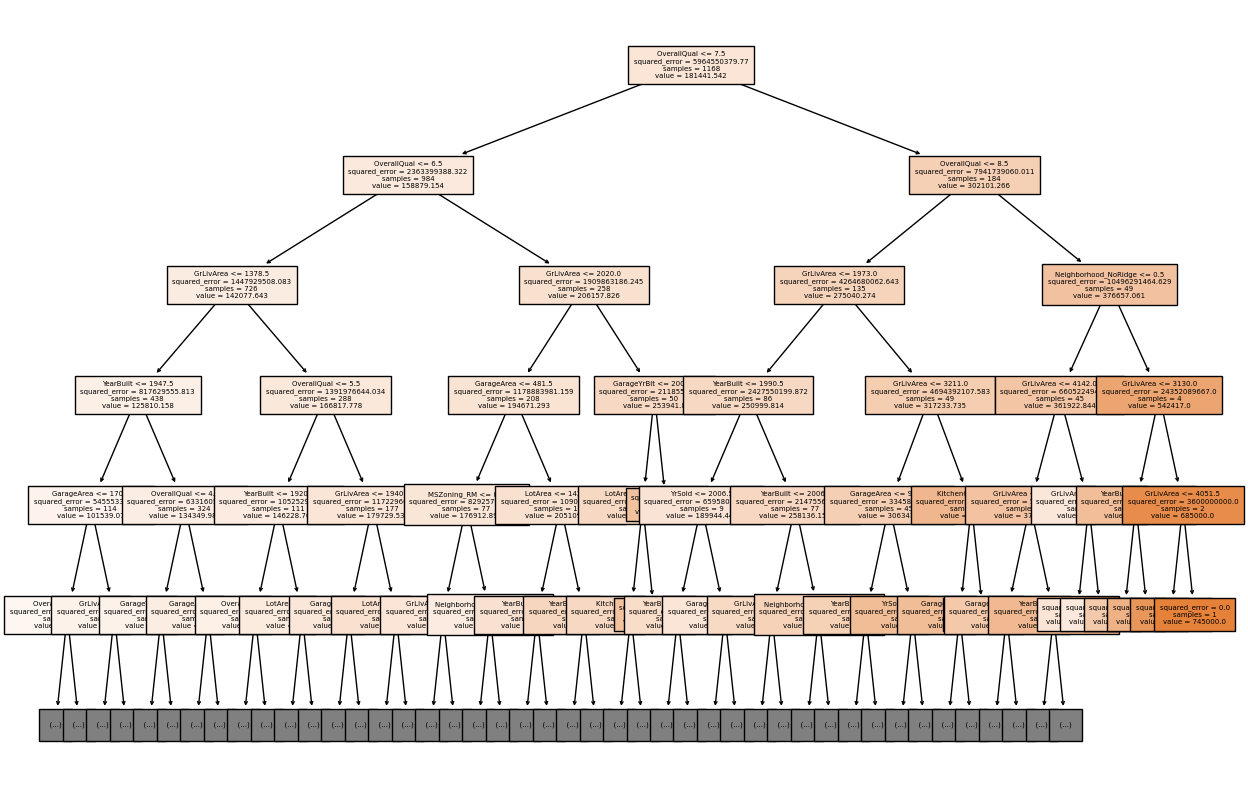

In [47]:
# Change max_depth to see only the first few features plot the tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, max_depth=5, fontsize=5)
plt.show()

**Random Forest**

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
from sklearn.metrics import mean_absolute_error, r2_score

# Decision Tree performance
y_pred_decision_tree = decision_tree.predict(X_test)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Random Forest performance
y_pred_random_forest = random_forest.predict(X_test)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Decision Tree MAE:", mae_decision_tree)
print("Decision Tree R-squared:", r2_decision_tree)

print("Random Forest MAE:", mae_random_forest)
print("Random Forest R-squared:", r2_random_forest)

Decision Tree MAE: 28457.568493150684
Decision Tree R-squared: 0.7598462583298887
Random Forest MAE: 19142.478504566207
Random Forest R-squared: 0.8798607799950457


In [50]:
# Create a Random Forest model with a different number of trees
random_forest_new = RandomForestRegressor(n_estimators = 10, random_state = 42)
random_forest_new.fit(X_train,y_train)
# Evaluate the new Random Forest model
y_pred_random_forest_new = random_forest_new.predict(X_test)
mae_random_forest_new = mean_absolute_error(y_test, y_pred_random_forest_new)
r2_random_forest_new = r2_score(y_test, y_pred_random_forest_new)

print("Random Forest (New) MAE:", mae_random_forest_new)
print("Random Forest (New) R-squared:", r2_random_forest_new)

Random Forest (New) MAE: 19820.46849315069
Random Forest (New) R-squared: 0.8772020668067835


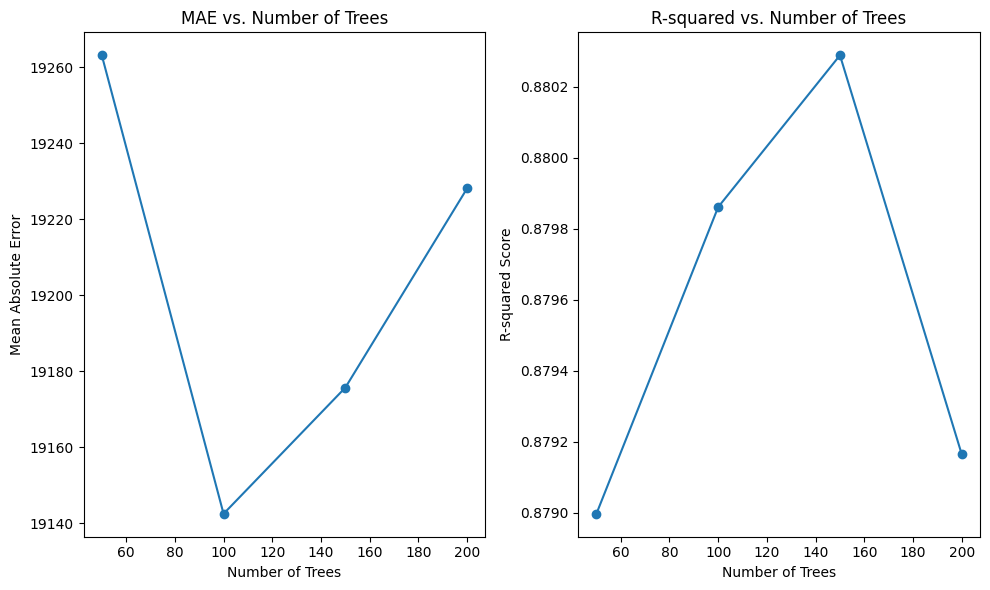

In [51]:
import numpy as np

# Vary the number of trees in the Random Forest
n_estimators_range = range(50, 250, 50)
mae_scores = []
r2_scores = []

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred_rf = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mae_scores, marker='o')
plt.title('MAE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_scores, marker='o')
plt.title('R-squared vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('R-squared Score')

plt.tight_layout()
plt.show()

### **SVR**:

Support Vector Machines (SVM) is a machine learning algorithm that can be used for both classification and regression tasks. Support Vector Classification (SVC) and Support Vector Regression (SVR) are two variants of SVM that are specifically tailored for different types of machine learning problems.



In [52]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
# SVMs, including SVR, are sensitive to the scale of input features. Scaling ensures that all features contribute equally to the decision process.
# Hence, scale the X_train before fitting the algorithm to it

# StandardScaler Standardizes features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Create a SVR model
model = SVR(kernel = "linear", C = 100, gamma = 0.1, epsilon = 0.1)
model.fit(X_train_scaled, y_train)

# Kernel = {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# C is a positive regularization parameter. The strength of the regularization is inversely proportional to C.



# SVR prediction

y_pred_svr = model.predict(X_test_scaled)

In [54]:
# Get the measurements for evaluation
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 22323.761306457185
R-squared (R2) Score: 0.7819737622726182


In [55]:
# How to improve the results?

In [56]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
# param_grid is a dictionary (or list of dictionaries) with parameters names (str) as keys and lists of parameter settings to try as values.
# cv determines the cross-validation splitting strategy.
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Perform a grid search with cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model from the grid search
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred_svr = best_svr.predict(X_test_scaled)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_svr)
print("Mean Absolute Error (MAE):", mae)

# Calculate and print the R-squared (R2) score
r2 = r2_score(y_test, y_pred_svr)
print("R-squared (R2) Score:", r2)

# Print the best kernel and hyperparameters
print("Best Kernel:", best_svr.kernel)
print("Best C:", best_svr.C)
print("Best Gamma:", best_svr.gamma)


Mean Absolute Error (MAE): 20205.389941025114
R-squared (R2) Score: 0.8692767493764678
Best Kernel: poly
Best C: 1
Best Gamma: 1


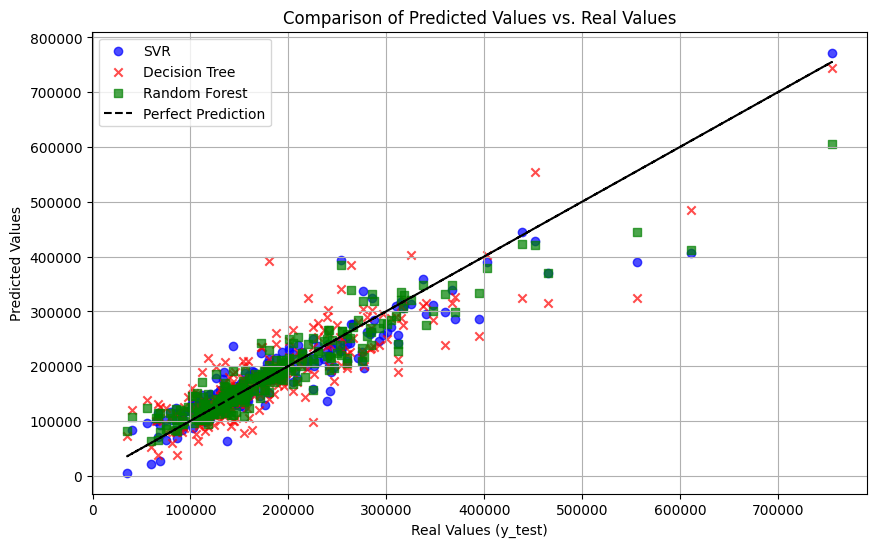

In [57]:
import matplotlib.pyplot as plt

# Plotting the real values (y_test) against the SVR predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, label='SVR', marker='o', color='blue', alpha=0.7)

# Adding Random Forest predictions
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree', marker='x', color='red', alpha=0.7)

# Adding Random Forest (New) predictions
plt.scatter(y_test, y_pred_random_forest, label='Random Forest', marker='s', color='green', alpha=0.7)

# Plotting the perfect prediction line (y_test = y_test)
plt.plot(y_test, y_test, 'k--', label='Perfect Prediction')

# Adding labels and legend
plt.xlabel("Real Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Comparison of Predicted Values vs. Real Values")
plt.legend()
plt.grid()

# Display the plot
plt.show()

References

* https://www.google.com/search?q=decision+tree+algorithm&sca_esv=572530057&biw=1536&bih=707&tbm=vid&sxsrf=AM9HkKn2OLtD25h_k9-65mPCVRoOifFNZA%3A1697030869036&ei=1aImZZLpAeyF0PEP3fitgAI&oq=dec&gs_lp=Eg1nd3Mtd2l6LXZpZGVvIgNkZWMqAggAMggQABiKBRiRAjIHEAAYigUYQzIIEAAYigUYkQIyBxAAGIoFGEMyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMggQABiABBixAzIFEAAYgARIhxRQhgZY4AlwAXgAkAEAmAGJAaAB7AOqAQMzLjK4AQPIAQD4AQHCAgQQIxgnwgIGEAAYFhgewgIIEAAYigUYhgPCAgsQABiKBRixAxiDAcICCxAAGIAEGLEDGIMBiAYB&sclient=gws-wiz-video#fpstate=ive&vld=cid:3863e517,vid:_L39rN6gz7Y,st:0


* https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer
* https://www.kaggle.com/code/vincentbrunner/ml-from-scratch-decision-trees